In [44]:
#Imports and Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# Helper: Plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(9, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(title)
    plt.show()


In [45]:
# Imports and Setup

data_path = r"C:\Users\Computer HuB\Desktop\cicids2017_cleaned.csv"
df = pd.read_csv(data_path)

# Clean column names
df.columns = df.columns.str.strip()

# Keep only 4 selected classes
classes_to_keep = ['Normal Traffic', 'Brute Force', 'DoS', 'DDoS']
df = df[df['Attack Type'].isin(classes_to_keep)]

print("Dataset shape after filtering:", df.shape)
df.head()



Dataset shape after filtering: (2425966, 53)


,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Max,Active Min,Idle Mean,Idle Max,Idle Min,Attack Type
0,22,1266342,41,2664,456,0,64.975610,109.864573,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
1,22,1319353,41,2664,456,0,64.975610,109.864573,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
2,22,160,1,0,0,0,0.000000,0.000000,0,0,...,243,0,32,0.0,0,0,0.0,0,0,Normal Traffic
3,22,1303488,41,2728,456,0,66.536585,110.129945,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
4,35396,77,1,0,0,0,0.000000,0.000000,0,0,...,290,0,32,0.0,0,0,0.0,0,0,Normal Traffic


In [47]:
#Feature Encoding & Preprocessing

# Drop missing values if any
df.dropna(inplace=True)

# Features and target
X = df.drop('Attack Type', axis=1)
y = df['Attack Type']

# Encode labels
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size=0.2, random_state=42)
# Drop missing values if any
df.dropna(inplace=True)

# Features and target
X = df.drop('Attack Type', axis=1)
y = df['Attack Type']

# Encode labels
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size=0.2, random_state=42)

In [48]:
#Train Supervised Models

# Decision Tree
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)

# Naive Bayes
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

# Random Forest
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [51]:
#Train Unsupervised Models
# Isolation Forest
model_iso = IsolationForest(contamination=0.01, random_state=42)
model_iso.fit(X_scaled)

# MiniBatchKMeans
model_kmeans = MiniBatchKMeans(n_clusters=len(np.unique(y_enc)), random_state=42)
model_kmeans.fit(X_scaled)

In [52]:
#Supervised Predictions and Evaluation
# Predict with supervised models
y_pred_dt = clf_dt.predict(X_test)
y_pred_nb = clf_nb.predict(X_test)
y_pred_rf = clf_rf.predict(X_test)

# Accuracy scores
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_nb = accuracy_score(y_test, y_pred_nb)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Print classification reports
print("Decision Tree:\n", classification_report(y_test, y_pred_dt, target_names=le.classes_))
print("Naive Bayes:\n", classification_report(y_test, y_pred_nb, target_names=le.classes_))
print("Random Forest:\n", classification_report(y_test, y_pred_rf, target_names=le.classes_))


Decision Tree:
                 precision    recall  f1-score   support

   Brute Force       1.00      1.00      1.00      1727
          DDoS       1.00      1.00      1.00     25451
           DoS       1.00      1.00      1.00     38821
Normal Traffic       1.00      1.00      1.00    419195

      accuracy                           1.00    485194
     macro avg       1.00      1.00      1.00    485194
  weighted avg       1.00      1.00      1.00    485194

Naive Bayes:
                 precision    recall  f1-score   support

   Brute Force       0.49      0.99      0.65      1727
          DDoS       0.50      1.00      0.67     25451
           DoS       0.68      0.93      0.78     38821
Normal Traffic       1.00      0.90      0.95    419195

      accuracy                           0.91    485194
     macro avg       0.67      0.96      0.76    485194
  weighted avg       0.95      0.91      0.92    485194

Random Forest:
                 precision    recall  f1-score   supp

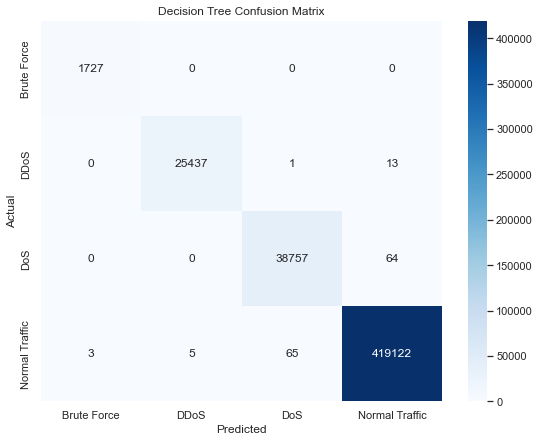

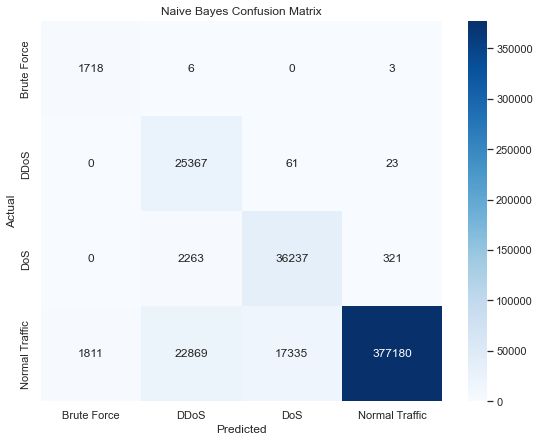

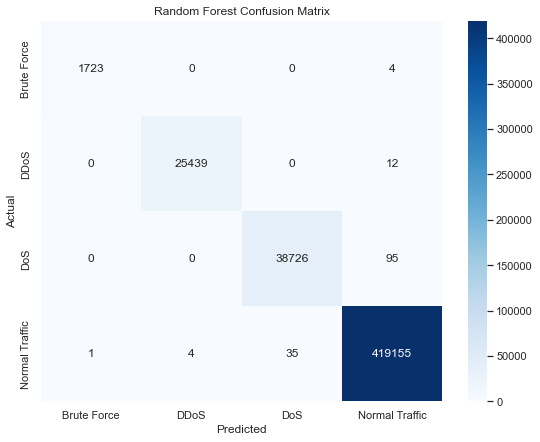

In [53]:
# Confusion Matrices for Supervised Models
plot_confusion_matrix(y_test, y_pred_dt, le.classes_, title="Decision Tree Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_nb, le.classes_, title="Naive Bayes Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_rf, le.classes_, title="Random Forest Confusion Matrix")



In [57]:
#Unsupervised Evaluation

from sklearn.metrics import adjusted_rand_score, accuracy_score

# -------- MiniBatchKMeans Evaluation --------
cluster_labels = model_kmeans.predict(X_test)
ari_kmeans = adjusted_rand_score(y_test, cluster_labels)
print(f"MiniBatchKMeans Adjusted Rand Index (ARI): {ari_kmeans:.4f}")

# -------- Isolation Forest Evaluation --------
iso_preds = model_iso.predict(X_test)  # -1 for anomaly, 1 for normal
iso_binary = np.where(iso_preds == -1, 1, 0)  # 1 = attack, 0 = normal

# Prepare binary test labels
y_binary_test = np.where(y_test == le.transform(['Normal Traffic'])[0], 0, 1)

acc_iso = accuracy_score(y_binary_test, iso_binary)
print(f"Isolation Forest Accuracy (binary): {acc_iso:.4f}")


MiniBatchKMeans Adjusted Rand Index (ARI): 0.1119
Isolation Forest Accuracy (binary): 0.8555


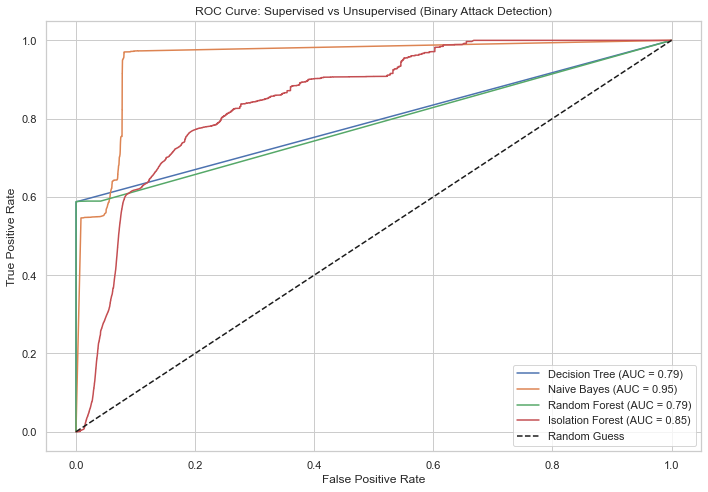

In [58]:
#ROC Curves for All Models (Supervised & Unsupervised)

# Supervised prediction probabilities
probs_dt = clf_dt.predict_proba(X_test)[:, list(le.classes_).index('DoS') if 'DoS' in le.classes_ else 1]
probs_nb = clf_nb.predict_proba(X_test)[:, list(le.classes_).index('DoS') if 'DoS' in le.classes_ else 1]
probs_rf = clf_rf.predict_proba(X_test)[:, list(le.classes_).index('DoS') if 'DoS' in le.classes_ else 1]

# ROC Curves
fpr_dt, tpr_dt, _ = roc_curve(y_binary_test, probs_dt)
fpr_nb, tpr_nb, _ = roc_curve(y_binary_test, probs_nb)
fpr_rf, tpr_rf, _ = roc_curve(y_binary_test, probs_rf)
fpr_iso, tpr_iso, _ = roc_curve(y_binary_test, iso_scores)

auc_dt = auc(fpr_dt, tpr_dt)
auc_nb = auc(fpr_nb, tpr_nb)
auc_rf = auc(fpr_rf, tpr_rf)
auc_iso = auc(fpr_iso, tpr_iso)

# Plot
plt.figure(figsize=(10, 7))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})")
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_nb:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_iso, tpr_iso, label=f"Isolation Forest (AUC = {auc_iso:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Supervised vs Unsupervised")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

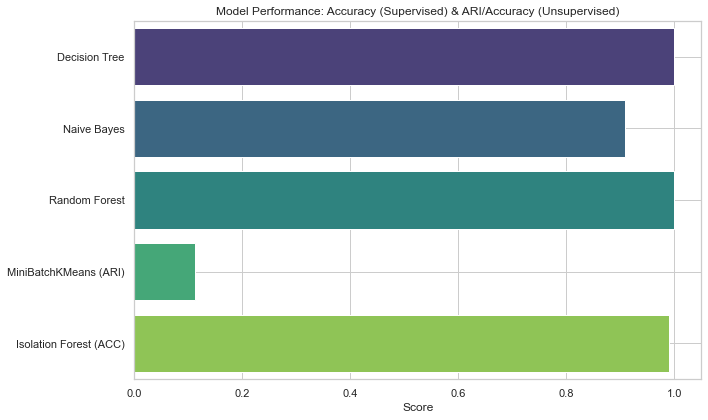

In [59]:
#Performance Comparison Bar Plot

# Summary of accuracy and ARI
model_names = ['Decision Tree', 'Naive Bayes', 'Random Forest', 'MiniBatchKMeans (ARI)', 'Isolation Forest (ACC)']
scores = [acc_dt, acc_nb, acc_rf, ari_kmeans, iso_acc]

plt.figure(figsize=(10, 6))
sns.barplot(x=scores, y=model_names, palette='viridis')
plt.title("Model Performance: Accuracy (Supervised) & ARI/Accuracy (Unsupervised)")
plt.xlabel("Score")
plt.xlim(0, 1.05)
plt.grid(True)
plt.tight_layout()
plt.show()


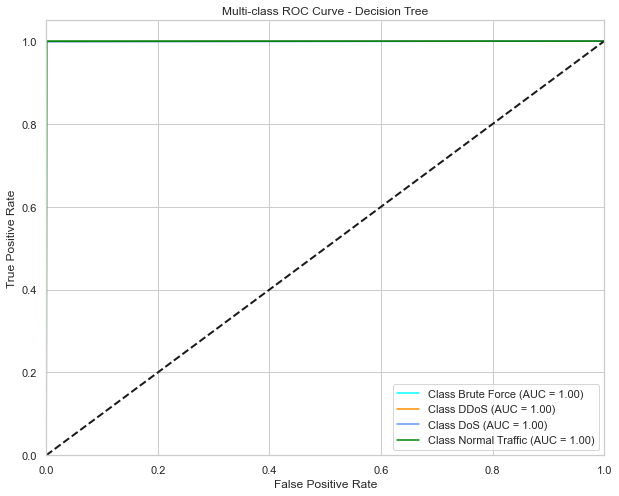

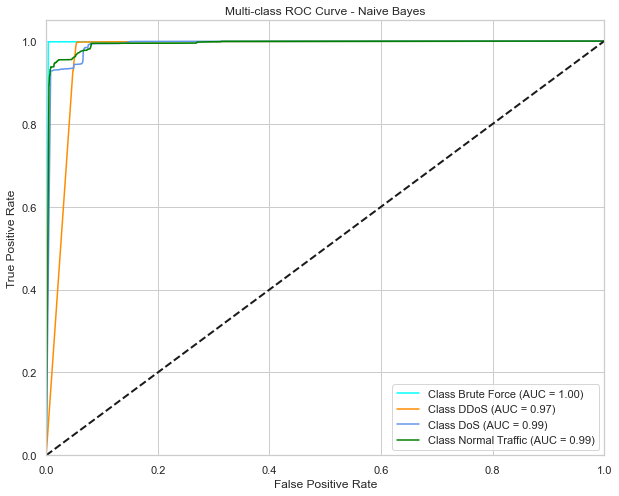

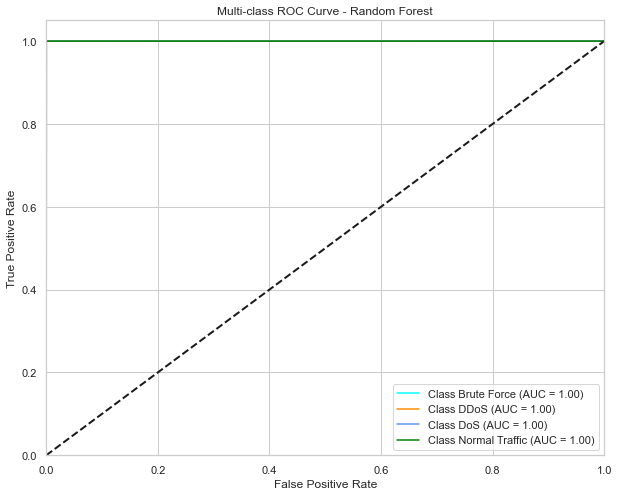

In [62]:
#Multi-class ROC Curve (One-vs-Rest) for Supervised Models

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarize the output labels for multi-class ROC
classes = le.classes_  # From your label encoder
n_classes = len(classes)
y_test_bin = label_binarize(y_test, classes=range(n_classes))  # shape (n_samples, n_classes)

# Prepare prediction probabilities for each model (shape: n_samples x n_classes)
probs_dt = clf_dt.predict_proba(X_test)
probs_nb = clf_nb.predict_proba(X_test)
probs_rf = clf_rf.predict_proba(X_test)

# Function to plot multi-class ROC curves for one model
def plot_multiclass_roc(y_test_bin, y_score, model_name):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink'])

    plt.figure(figsize=(10, 8))
    for i, color in zip(range(n_classes), colors):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], color=color,
                 label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Multi-class ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Plot ROC curves for each supervised model
plot_multiclass_roc(y_test_bin, probs_dt, "Decision Tree")
plot_multiclass_roc(y_test_bin, probs_nb, "Naive Bayes")
plot_multiclass_roc(y_test_bin, probs_rf, "Random Forest")


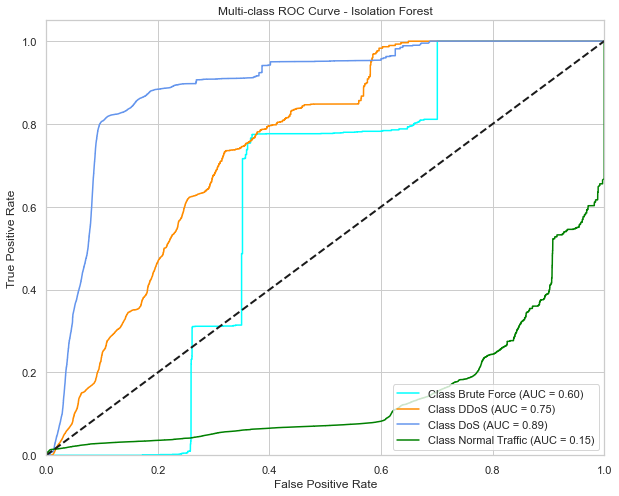

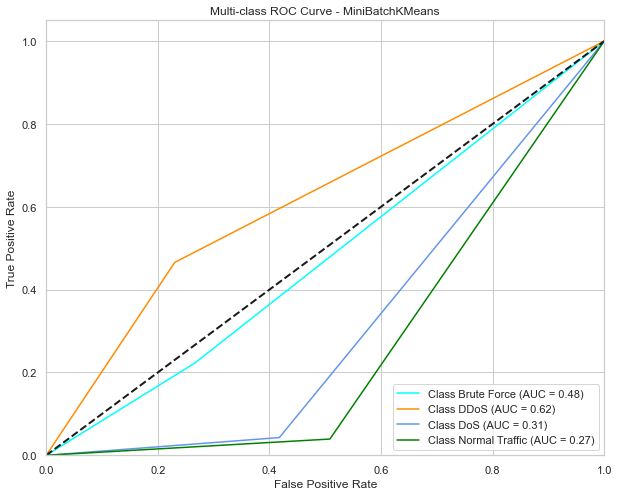

In [64]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import numpy as np

# Binarize true labels
classes = le.classes_
n_classes = len(classes)
y_test_bin = label_binarize(y_test, classes=range(n_classes))

# 1. Isolation Forest anomaly scores (higher score = more normal, so invert)
iso_scores = -model_iso.score_samples(X_test)  # Use test set here
# We have a single anomaly score, so replicate it for all classes for ROC multi-class
# This is a hack: treat the anomaly score as "probability" for all classes vs rest
# For multi-class ROC, we create an array shape (n_samples, n_classes)
iso_scores_multi = np.tile(iso_scores.reshape(-1, 1), n_classes)

# 2. MiniBatchKMeans cluster assignments on test set
kmeans_labels = model_kmeans.predict(X_test)  # Cluster labels

# Convert cluster labels to one-hot binary matrix as "scores"
# But we want probability-like scores per class, so:
# For each cluster label, assign 1, else 0 (hard assignment)
kmeans_scores = np.zeros((len(kmeans_labels), n_classes))
for i in range(n_classes):
    kmeans_scores[:, i] = (kmeans_labels == i).astype(int)

# Function to plot multi-class ROC for unsupervised model scores
def plot_multiclass_roc_unsupervised(y_test_bin, y_score, model_name):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink'])

    plt.figure(figsize=(10, 8))
    for i, color in zip(range(n_classes), colors):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], color=color,
                 label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Multi-class ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Plot ROC for Isolation Forest
plot_multiclass_roc_unsupervised(y_test_bin, iso_scores_multi, "Isolation Forest")

# Plot ROC for MiniBatchKMeans
plot_multiclass_roc_unsupervised(y_test_bin, kmeans_scores, "MiniBatchKMeans")
